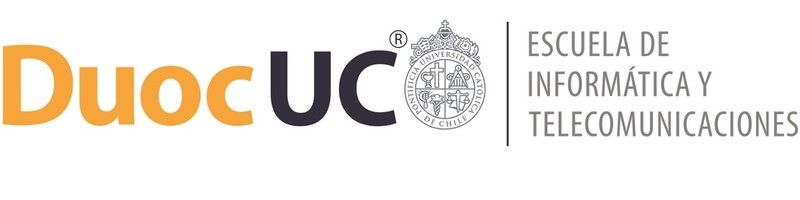

# Metodologia CRISP en Notebook


# Caso E.T

CONTEXTO CASO




Variables


## Fase 1: Business Understanding

In [14]:
# Insertar cuantos bloques de código y markdown consideren necesarios
# Se recomienda investigar sobre el contexto de tema del dataset, sobre los datos, uso de los campos en estadísticas,
# ver en qué se relacionan los contenidos.

#### Contexto del Negocio

El banco "Dormammu" ha adquirido al banco chileno "Monopoly" y busca integrar a sus nuevos clientes de manera efectiva mientras optimiza su estrategia de negocio. El objetivo principal es comprender a los clientes de "Monopoly" para detectar patrones en su comportamiento financiero, identificar oportunidades de crecimiento (como cross-selling de productos financieros) y minimizar el riesgo (como la morosidad o el abandono de clientes). El banco "Dormammu" desea usar los datos históricos de 12 meses de actividad financiera de estos clientes para diseñar estrategias de marketing dirigidas, mejorar la retención de clientes y maximizar la rentabilidad.

#### Preguntas de Negocio

1. ¿Cuáles son los segmentos de clientes más rentables y cuáles presentan mayores riesgos financieros?
2. ¿Qué patrones de uso de productos financieros se observan entre los clientes de "Monopoly"?
3. ¿Qué características de los clientes están más asociadas con la alta rentabilidad o el alto riesgo?
4. ¿Cómo se pueden diseñar campañas de marketing más efectivas basadas en el comportamiento y características de los clientes?

### 3. Hipótesis del Negocio

Las hipótesis del negocio se formulan para guiar el análisis de datos y los modelos predictivos, asegurando que el enfoque esté alineado con los objetivos estratégicos del banco "Dormammu".

#### 3.1 Tareas de Regresión

**Hipótesis:**

- Los ingresos del cliente ("Renta") y su antigüedad con el banco están positivamente correlacionados con el monto total gastado en productos financieros (como tarjetas de crédito) a lo largo de los 12 meses.
- El uso promedio de la línea de crédito (cupo de TC y avances en cuotas) puede predecir el monto facturado por el cliente en los próximos meses.

**Tareas de Regresión:**

1. **Predecir el Monto de Gasto Futuro:**
   - Utilizar técnicas de regresión para predecir el monto que un cliente gastará en productos financieros (como tarjetas de crédito, créditos de consumo, etc.) en los próximos meses, basado en su comportamiento financiero pasado.

2. **Estimar la Probabilidad de Pago:**
   - Modelar la relación entre el comportamiento de pago del cliente (historial de pagos, deuda acumulada) y su probabilidad de mantenerse al día con sus obligaciones financieras en los próximos 3 a 6 meses.

#### 3.2 Tareas de Clasificación

**Hipótesis:**

- Los clientes con múltiples tarjetas de crédito y líneas de crédito abiertas tienen un mayor riesgo de impago.
- Los clientes que usan frecuentemente los servicios digitales del banco (clientes internautas) son menos propensos a cambiar de banco o abandonar el uso de productos financieros.
- Ciertos segmentos de clientes (por ejemplo, según región, subsegmento o renta) tienen un comportamiento homogéneo que permite segmentarlos en grupos bien definidos (clientes de alto valor, riesgo moderado, riesgo alto).

**Tareas de Clasificación:**

1. **Identificar Clientes en Riesgo de Abandono:**
   - Utilizar técnicas de clasificación (como Random Forest o Gradient Boosting) para identificar clientes con alta probabilidad de abandonar el banco o dejar de usar productos específicos, basado en características demográficas y comportamiento histórico.

2. **Segmentación de Clientes:**
   - Clasificar a los clientes en diferentes segmentos (por ejemplo, clientes de alto valor, clientes potenciales para cross-selling, clientes en riesgo) para orientar las campañas de marketing y estrategias de retención.

3. **Detección de Fraude o Comportamiento Atípico:**
   - Implementar modelos de clasificación para identificar transacciones o patrones de comportamiento que sean atípicos o puedan indicar posibles fraudes financieros.


## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

#### Cargar Librerías y Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('data/Base_clientes_Monopoly.xlsx',header=1)

#### Previsualización de los Datos

In [8]:
print("Primeras 5 filas del DataFrame:")
df.head()

Primeras 5 filas del DataFrame:


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN


#### Estadistica descriptiva

In [3]:
# Estadísticas descriptivas para variables numéricas
numeric_stats = df.describe().transpose()  # Transpone para una mejor visualización
numeric_stats = numeric_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

print("Estadísticas Descriptivas para Variables Numéricas:")
display(numeric_stats)  # Utiliza 'display' para una mejor visualización en notebooks

# Estadísticas descriptivas para variables categóricas
categorical_stats = df.describe(include=['object']).transpose()
categorical_stats = categorical_stats[['count', 'unique', 'top', 'freq']]

print("\nEstadísticas Descriptivas para Variables Categóricas:")
display(categorical_stats)  # Utiliza 'display' para una mejor visualización en notebooks

Estadísticas Descriptivas para Variables Numéricas:


,mean,std,min,25%,50%,75%,max
Id,25562.500000,14758.371918,1.00,12781.75,25562.5,38343.25,51124.00
Subsegmento,182.024274,29.276596,151.00,160.00,170.0,210.00,959.00
Region,10.828220,3.392703,1.00,9.00,13.0,13.00,13.00
Edad,38.702879,13.302573,9.00,28.00,35.0,46.00,104.00
Renta,663077.078726,409279.460268,1.00,419999.00,567012.0,814903.50,13089327.00
...,...,...,...,...,...,...,...
UsoL1_T01,184092.343547,289173.134339,-3763996.60,17707.50,81129.0,227814.50,6911556.00
UsoL2_T01,136032.715750,432538.882162,-4.00,0.00,29646.5,102102.25,11785487.00
UsoLI_T01,8.294372,113.215624,-7785.12,0.00,0.0,0.00,3929.81
target,0.089977,0.286152,0.00,0.00,0.0,0.00,1.00



Estadísticas Descriptivas para Variables Categóricas:


,count,unique,top,freq
Sexo,51123,2,H,27410
IndRev_T12,42873,3,R,26899
IndRev_T11,44492,3,R,27761
IndRev_T10,45933,3,R,29238
IndRev_T09,47324,3,R,30249
IndRev_T08,48924,3,R,31920
IndRev_T07,50291,3,R,34162
IndRev_T06,51077,3,R,34828
IndRev_T05,51099,3,R,37270
IndRev_T04,51105,3,R,39176


#### Variables

##### Tipo de variables

In [5]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_count = len(categorical_columns)

# Identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_count = len(numerical_columns)

# Crear un DataFrame para mostrar las columnas categóricas y numéricas
categorical_df = pd.DataFrame({'Columnas Categóricas': categorical_columns})
numerical_df = pd.DataFrame({'Columnas Numéricas': numerical_columns})

# Mostrar resultados de forma amigable
print(f"Cantidad de columnas categóricas: {categorical_count}")
print(f"Cantidad de columnas numéricas: {numerical_count}\n")

# Mostrar DataFrames de columnas categóricas y numéricas
from IPython.display import display

display(categorical_df)
display(numerical_df)

Cantidad de columnas categóricas: 13
Cantidad de columnas numéricas: 562



,Columnas Categóricas
0,Sexo
1,IndRev_T12
2,IndRev_T11
3,IndRev_T10
4,IndRev_T09
5,IndRev_T08
6,IndRev_T07
7,IndRev_T06
8,IndRev_T05
9,IndRev_T04


,Columnas Numéricas
0,Id
1,Subsegmento
2,Region
3,Edad
4,Renta
...,...
557,UsoL1_T01
558,UsoL2_T01
559,UsoLI_T01
560,target


##### Visualización de la distribución de variables categóricas

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


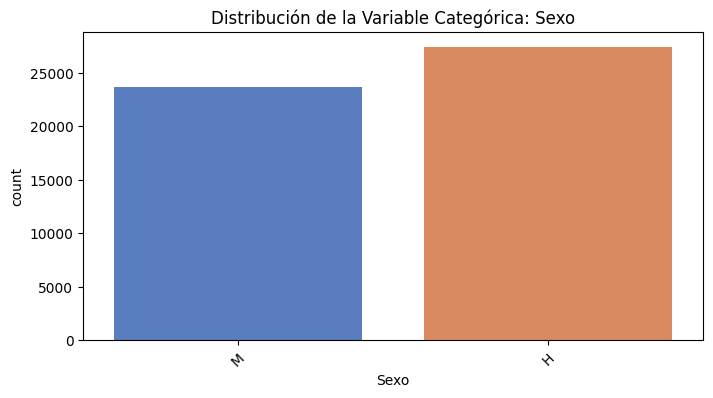

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


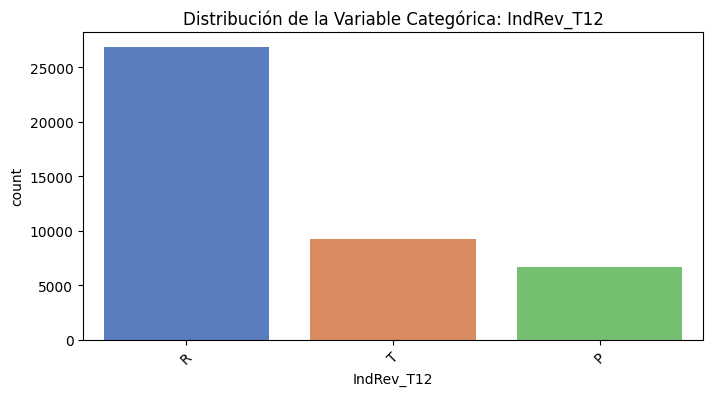

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


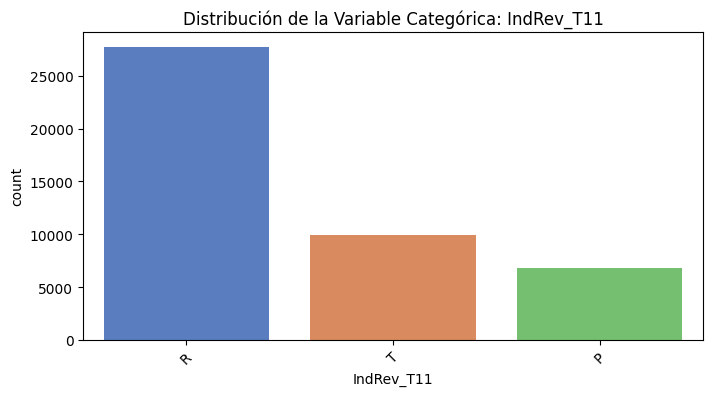

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


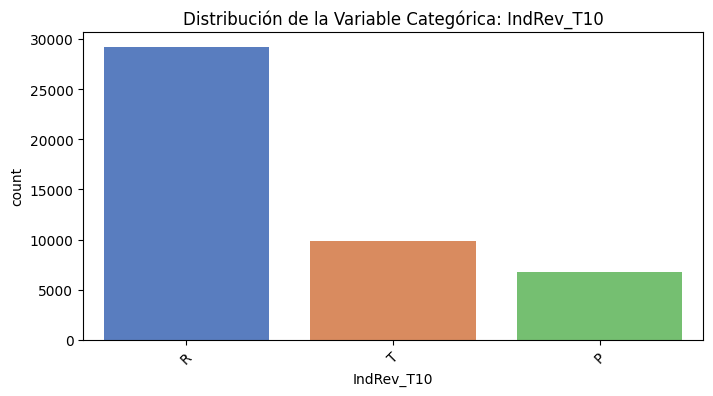

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


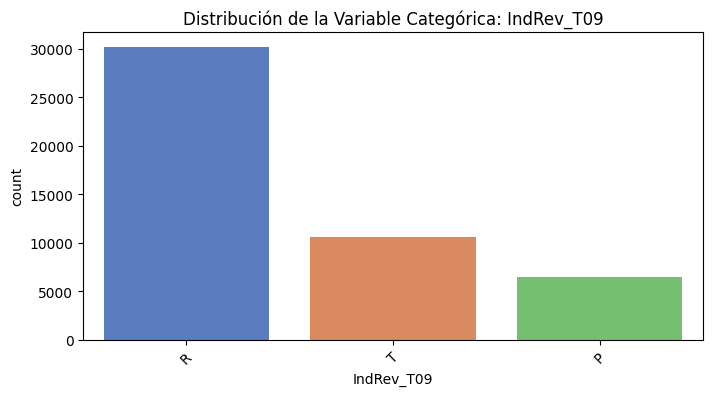

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


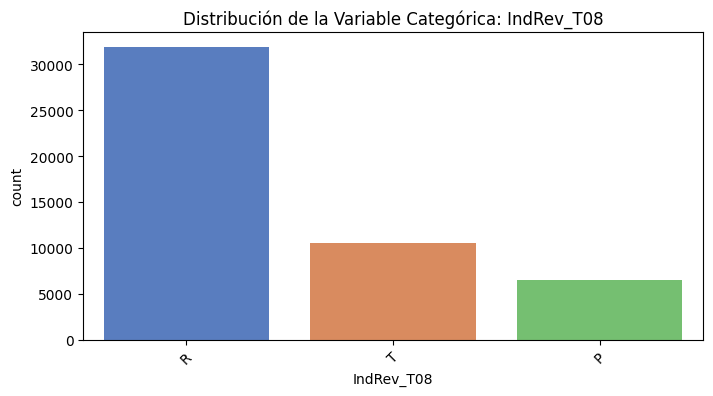

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


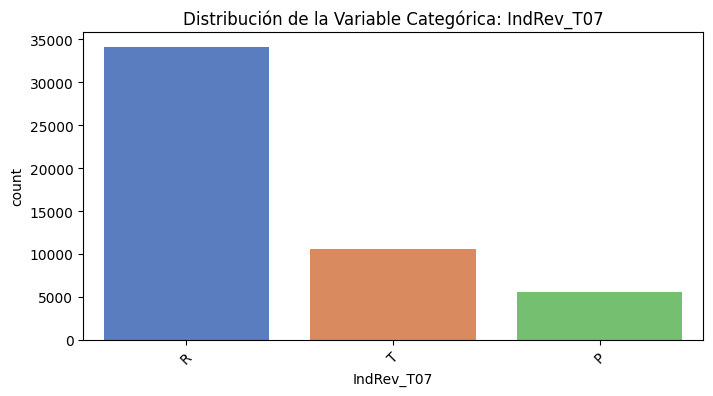

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


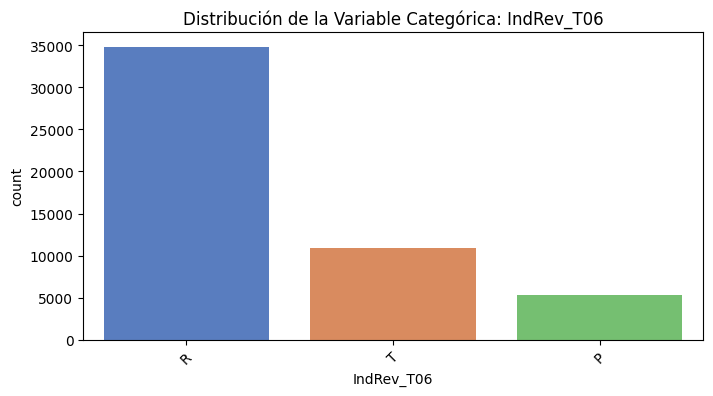

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


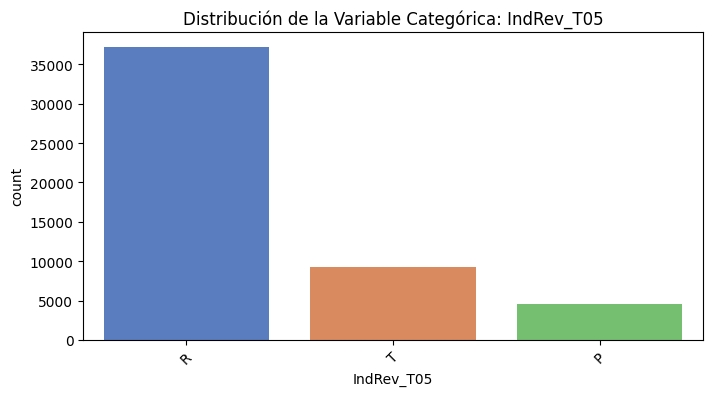

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


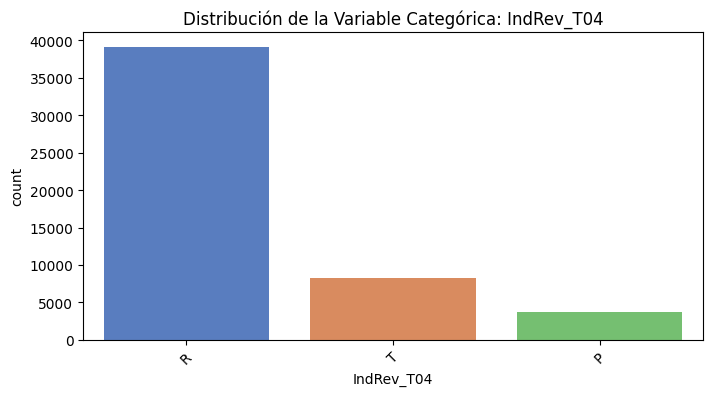

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


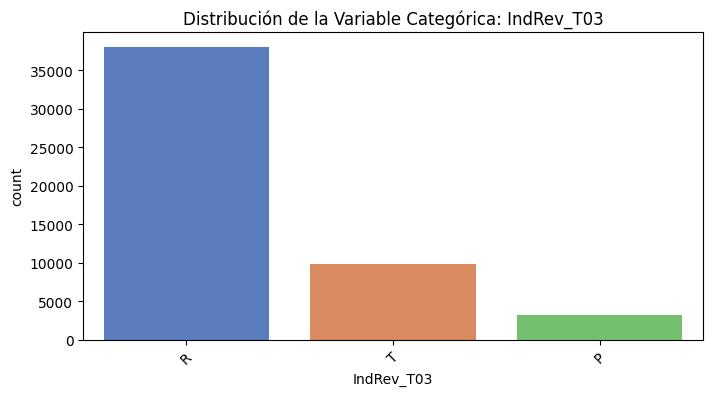

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


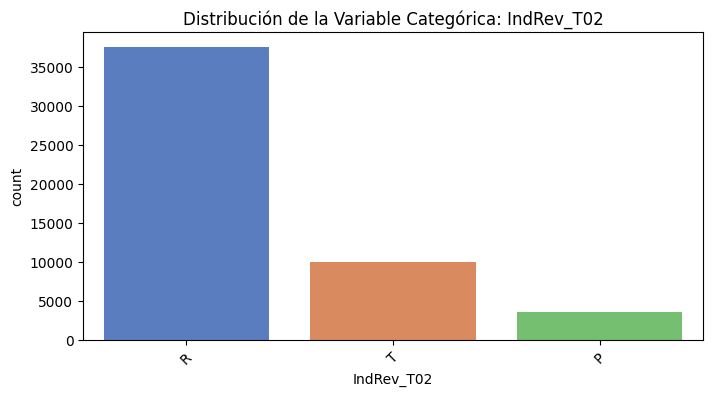

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


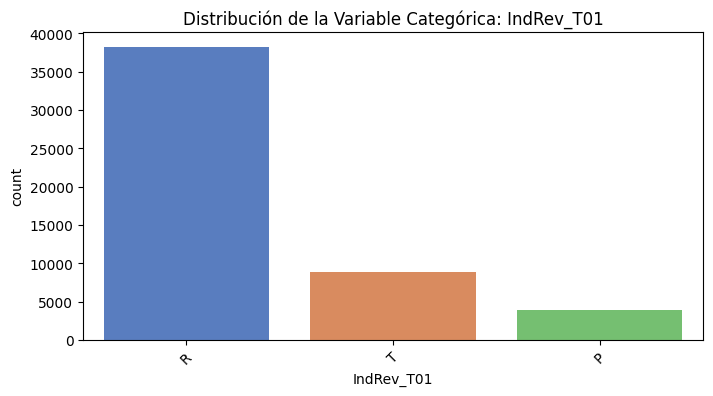

In [14]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='muted')
    plt.title(f'Distribución de la Variable Categórica: {col}')
    plt.xticks(rotation=45)
    plt.show()


##### Análisis de correlación entre variables numéricas

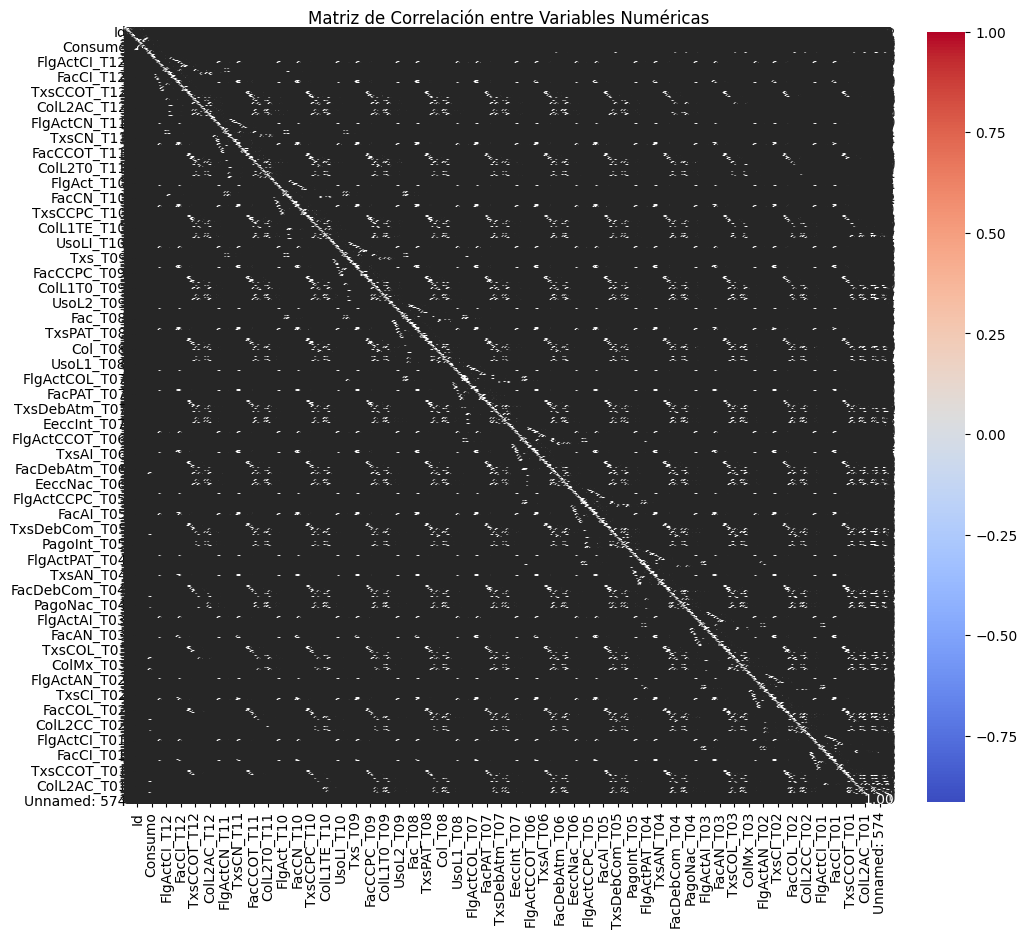

In [11]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

##### Visualización de relaciones entre variables

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Renta', y='Edad', hue='Sexo')
plt.title('Relación entre Edad, Renta y Sexo')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sexo', y='Renta')
plt.title('Distribución de la Renta por Sexo')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Renta')
plt.title('Distribución de la Renta por Región')
plt.xticks(rotation=45)
plt.show()

#### Valores faltantes

In [5]:
# Calcular el número de valores faltantes por columna
missing_values = df.isnull().sum()

# Iterar sobre los ítems de missing_values para imprimir solo aquellos con valores faltantes

print('Columnas con valores faltantes')
print('------------------------------')
for column, count in missing_values.items():
    if count > 0:
        print(f"-{column}: {count} valores faltantes")

Columnas con valores faltantes
------------------------------
-Sexo: 1 valores faltantes
-Region: 53 valores faltantes
-Renta: 13365 valores faltantes
-CambioPin: 19388 valores faltantes
-FlgAct_T12: 8251 valores faltantes
-FlgActCN_T12: 8251 valores faltantes
-FlgActCI_T12: 8251 valores faltantes
-FlgActAN_T12: 8251 valores faltantes
-FlgActAI_T12: 8251 valores faltantes
-FlgActPAT_T12: 8251 valores faltantes
-FlgActCCPC_T12: 8251 valores faltantes
-FlgActCCOT_T12: 8251 valores faltantes
-FlgActCOL_T12: 8251 valores faltantes
-Fac_T12: 8251 valores faltantes
-Txs_T12: 8251 valores faltantes
-FacCN_T12: 8251 valores faltantes
-TxsCN_T12: 8251 valores faltantes
-FacCI_T12: 8251 valores faltantes
-TxsCI_T12: 8251 valores faltantes
-FacAN_T12: 8251 valores faltantes
-TxsAN_T12: 8251 valores faltantes
-FacAI_T12: 8251 valores faltantes
-TxsAI_T12: 8251 valores faltantes
-FacPAT_T12: 8251 valores faltantes
-TxsPAT_T12: 8251 valores faltantes
-FacCCPC_T12: 8251 valores faltantes
-TxsCCPC_T12

#### Outliers

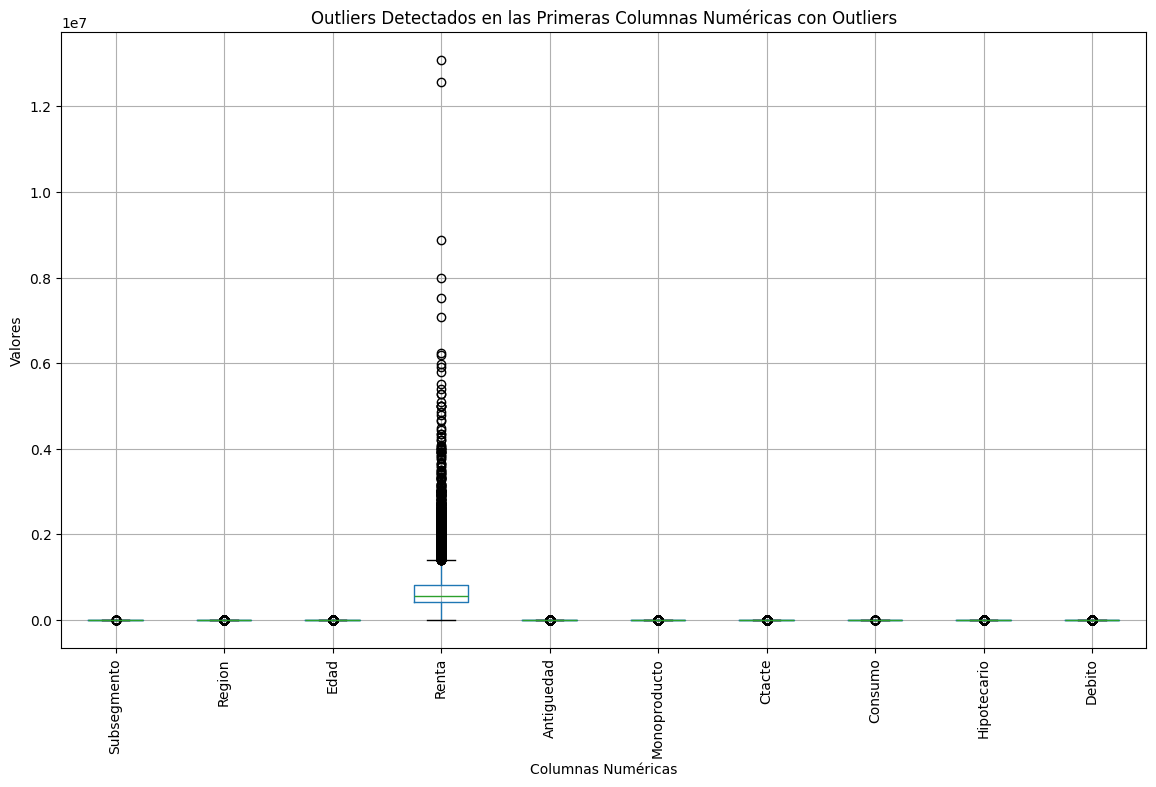

Outliers detectados en las primeras columnas con outliers:
       Subsegmento  Region  Edad     Renta  Antiguedad  Monoproducto  Ctacte  \
0              160    13.0    43       NaN         130             0       1   
1              160    13.0    46  143640.0          69             0       1   
2              170    13.0    45  929106.0          24             0       1   
3              151    13.0    46  172447.0         134             1       0   
4              170    13.0    46  805250.0         116             0       1   
...            ...     ...   ...       ...         ...           ...     ...   
51119          160    13.0    51  364978.0          57             0       1   
51120          170    13.0    51  625376.0          39             0       1   
51121          160    13.0    47  806220.0         153             0       1   
51122          160    13.0    47       NaN          11             0       1   
51123          170    13.0    51  840878.0          75       

In [14]:
# Re-identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers: fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Filtrar las filas que contienen outliers
df_outliers = df[numerical_columns][outliers.any(axis=1)]

# Mostrar los gráficos de los outliers de manera clara para las primeras columnas con outliers detectados
columns_with_outliers = outliers.sum()[outliers.sum() > 0].index.tolist()[:10]  # Seleccionar las primeras 10 columnas con outliers

plt.figure(figsize=(14, 8))
df_outliers[columns_with_outliers].boxplot(rot=90)
plt.title('Outliers Detectados en las Primeras Columnas Numéricas con Outliers')
plt.xlabel('Columnas Numéricas')
plt.ylabel('Valores')
plt.show()

# Mostrar los datos de los outliers en pantalla
print("Outliers detectados en las primeras columnas con outliers:")
print(df_outliers[columns_with_outliers])

## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

#### Manejo de valores faltantes

Motivos:

Elegí imputar los valores faltantes numéricos con la mediana porque la mediana es menos sensible a los outliers que la media. Este enfoque es ideal cuando hay datos atípicos en las columnas numéricas.
Para las variables categóricas, utilicé la moda (valor más frecuente) para imputar los valores faltantes. La moda es una buena opción cuando los valores categóricos no tienen un orden intrínseco y queremos conservar la distribución de los datos existentes.

Descubrimientos y Patrones:

Observamos que algunas columnas tenían una cantidad significativa de valores faltantes, lo que sugiere que ciertos atributos no se registraron consistentemente en todas las muestras.
Las variables categóricas tenían relativamente pocos valores faltantes, lo que facilitó su imputación utilizando la moda.

In [15]:
# Verificar la cantidad de valores faltantes en cada columna
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

# Imputar valores faltantes o eliminarlos, dependiendo de la cantidad de valores faltantes
# Ejemplo: Imputar con la mediana para columnas numéricas
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Ejemplo: Imputar con el valor más frecuente (moda) para columnas categóricas
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


Valores faltantes por columna:
Sexo                1
Region             53
Renta           13365
CambioPin       19388
FlgAct_T12       8251
                ...  
UsoL1_T02          12
UsoL2_T02          12
UsoLI_T02          12
IndRev_T02         12
Unnamed: 574    51124
Length: 511, dtype: int64


#### Codificación de Variables Categóricas


Motivos:

Utilicé One-Hot Encoding porque esta técnica no asume ningún orden en los datos categóricos y crea columnas binarias que representan la presencia o ausencia de una categoría. Esto es particularmente útil cuando las variables categóricas son nominales (sin orden) y tienen relativamente pocas categorías.

Descubrimientos y Patrones:

Al aplicar One-Hot Encoding, notamos un aumento significativo en el número de columnas. Esto sugiere que algunas variables categóricas tenían muchas categorías posibles. Aunque esto incrementa la dimensionalidad de los datos, proporciona una representación precisa de las características categóricas.
Las variables categóricas codificadas revelaron que ciertas categorías son mucho más frecuentes que otras, lo que puede ser útil para detectar patrones o segmentos dominantes en el análisis posterior.

In [16]:
# Codificar variables categóricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("DataFrame después de codificación categórica:")
print(df_encoded.head())


DataFrame después de codificación categórica:
   Id  Subsegmento  Region  Edad     Renta  Antiguedad  Internauta  Adicional  \
0   1          160    13.0    43  567012.0         130           1          1   
1   2          160    13.0    46  143640.0          69           1          0   
2   3          170    13.0    45  929106.0          24           1          1   
3   4          151    13.0    46  172447.0         134           0          1   
4   5          170    13.0    46  805250.0         116           0          1   

   Dualidad  Monoproducto  ...  IndRev_T05_R  IndRev_T05_T  IndRev_T04_R  \
0         0             0  ...          True         False          True   
1         0             0  ...          True         False          True   
2         0             0  ...         False          True         False   
3         0             1  ...          True         False          True   
4         1             0  ...         False          True         False   

   IndRev_

#### Normalización de Datos Numéricos


Motivos:

Utilicé la técnica de StandardScaler, que transforma los datos para tener una media de 0 y una desviación estándar de 1. Esta técnica es adecuada cuando se quiere preservar la forma de la distribución de los datos, lo cual es crucial para modelos que suponen que los datos son normalmente distribuidos.

Descubrimientos y Patrones:

Tras la estandarización, observamos que los datos numéricos se concentran en torno a la media (0) con una desviación estándar de 1, lo que indica que están en una escala comparable.
Algunos atributos, especialmente aquellos con outliers, tienen una dispersión mucho mayor que otros, lo que sugiere que hay variabilidad significativa en ciertas características. Esto puede ser relevante para modelos que se enfocan en identificar patrones de alta variabilidad.

In [19]:
# Estandarizar datos numéricos
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print("DataFrame después de la estandarización:")
print(df_encoded.head())


c:\Users\nicol\Desktop\Machine Lerning\env\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\nicol\Desktop\Machine Lerning\env\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\nicol\Desktop\Machine Lerning\env\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


DataFrame después de la estandarización:
         Id  Subsegmento    Region      Edad     Renta  Antiguedad  \
0 -1.732017    -0.752290  0.639671  0.323032 -0.200283    2.553917   
1 -1.731949    -0.752290  0.639671  0.548555 -1.395385    0.843902   
2 -1.731881    -0.410717  0.639671  0.473381  0.821842   -0.417584   
3 -1.731814    -1.059706  0.639671  0.548555 -1.314068    2.666049   
4 -1.731746    -0.410717  0.639671  0.548555  0.472219    2.161455   

   Internauta  Adicional  Dualidad  Monoproducto  ...  IndRev_T05_R  \
0    0.679384   1.703963 -0.785122     -0.259607  ...          True   
1    0.679384  -0.586867 -0.785122     -0.259607  ...          True   
2    0.679384   1.703963 -0.785122     -0.259607  ...         False   
3   -1.471922   1.703963 -0.785122      3.851970  ...          True   
4   -1.471922   1.703963  1.273688     -0.259607  ...         False   

   IndRev_T05_T  IndRev_T04_R  IndRev_T04_T  IndRev_T03_R  IndRev_T03_T  \
0         False          True       

#### Manejo de Outliers

Motivos:

Opté por imputar los outliers para preservar toda la información sin eliminar registros completos, lo que evita perder datos valiosos, y al mismo tiempo reducir la influencia de los valores extremos, minimizando así el sesgo que los outliers podrían causar en modelos sensibles. Esta estrategia también permite mantener la varianza y la distribución original de los datos, asegurando que sigan representando correctamente la población, y mejora la adaptabilidad del conjunto de datos a múltiples algoritmos de machine learning, logrando una mayor precisión y estabilidad en los resultados. En resumen, la imputación de outliers equilibra la integridad del conjunto de datos con la necesidad de tener un análisis robusto y fiable.

In [22]:
# Re-identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers: fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Imputar outliers: Reemplazar con el límite inferior o superior del IQR
for column in numerical_columns:
    df[column] = df[column].mask(df[column] < lower_bound[column], lower_bound[column])
    df[column] = df[column].mask(df[column] > upper_bound[column], upper_bound[column])

print("DataFrame después de la imputación de outliers:")
df.head()

DataFrame después de la imputación de outliers:


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,567012.0,114,1,1,0,...,33000,0.0,541973.5,0.0,542975.0,15080.000,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,222500,0.0,214592.0,0.0,214592.0,83596.000,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0.000,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,114,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591.000,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,114,0,1,1,...,222500,0.0,249562.0,0.0,75339.0,255255.625,0.0,R,0,NaN


## Fase 4: Modeling

### Aprendizaje Supervisado - Regresión

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de regresión de datos orientado al caso entregado

### Aprendizaje Supervisado - Clasificación



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de clasificación de datos orientado al caso entregado

### Aprendizaje NO Supervisado - Clustering



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de regresión de datos orientado al caso entregado

## Fase 5: Evaluation

### Aprendizaje Supervisado - Regresión

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

### Aprendizaje NO Supervisado - Clustering



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

### Aprendizaje NO Supervisado - Clustering



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

## Fase 6: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo